In [2]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
cancer = pd.read_csv('https://raw.githubusercontent.com/AUP-CS2091/class/master/week12/breast-cancer.csv').drop("ID",1)


In [5]:
cancer.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [6]:
train, test = train_test_split(cancer, test_size=0.4)
train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
546,5,1,1,1,2,1,3,1,1,0
447,6,1,1,3,2,1,1,1,1,0
88,1,1,1,1,2,1,3,1,1,0
440,10,2,2,1,2,6,1,1,2,1
645,4,1,1,1,2,1,3,1,1,0
294,1,1,1,1,2,1,3,1,1,0
233,5,1,3,3,2,2,2,3,1,0
349,4,4,4,2,2,3,2,1,1,0
455,3,1,1,1,1,1,2,1,1,0
667,1,1,1,1,2,1,1,1,1,0


In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train.drop("Class",1),train["Class"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
predicted= model.predict(test.drop("Class",1))
predicted

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [9]:
accuracy_score(test["Class"], predicted)

0.9708029197080292

In [65]:
titanic = pd.read_csv('https://raw.githubusercontent.com/AUP-CS2091/class/master/week13/titanic-data.csv')
titanic['Sex'] = titanic['Sex'].astype('category')
titanic.dtypes
titanic['Embarked'] = titanic['Embarked'].astype('category')


In [66]:
cat_columns = titanic.select_dtypes(['category']).columns
titanic[cat_columns] = titanic[cat_columns].apply(lambda x: x.cat.codes)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0


## Modeling chances for surviving the sinking of the Titanic

Part of a data scientist's job is to use her or his intuition and insight to
write algorithms and heuristics. A data scientist also creates mathematical models 
to make predictions based on some attributes from the data that they are examining.

You need to take your knowledge and intuition about the Titanic
and its passengers' attributes to predict whether or not the passengers survived
or perished. You can read more about the Titanic and specifics about this dataset at:
http://en.wikipedia.org/wiki/RMS_Titanic
http://www.kaggle.com/c/titanic-gettingStarted

Next, you are given a list of Titantic passengers
and their associated information. More information about the data can be seen at the 
link below:
http://www.kaggle.com/c/titanic-gettingStarted/data. 

Can you need to write a heuristic that will use
the passengers' information to predict if that person survived the Titanic disaster?

You prediction should be 79% accurate or higher.

Can you get an accuracy of above 80%?

Here's a simple heuristic to start off:
   1) If the passenger is female, your heuristic should assume that the
   passenger survived.
   2) If the passenger is male, you heuristic should
   assume that the passenger did not survive.

You can access the gender of a passenger via passenger['Sex'].
If the passenger is male, passenger['Sex'] will return a string "male".
If the passenger is female, passenger['Sex'] will return a string "female".

Write your prediction back into the "predictions" dictionary. The
key of the dictionary should be the passenger's id (which can be accessed
via passenger["PassengerId"]) and the associated value should be 1 if the
passenger survied or 0 otherwise.

For example, if a passenger is predicted to have survived:
passenger_id = passenger['PassengerId']
predictions[passenger_id] = 1

And if a passenger is predicted to have perished in the disaster:
passenger_id = passenger['PassengerId']
predictions[passenger_id] = 0


## Data

The available attributes are:

    Pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    Name            Name
    Sex             Sex
    Age             Age
    SibSp           Number of Siblings/Spouses Aboard
    Parch           Number of Parents/Children Aboard
    Ticket          Ticket Number
    Fare            Passenger Fare
    Cabin           Cabin
    Embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socioeconomic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in years; fractional if age less than one
If the age is estimated, it is in the form xx.5

With respect to the family relation variables (i.e. SibSp and Parch)
some relations were ignored. The following are the definitions used
for SibSp and Parch.

    Sibling:  brother, sister, stepbrother, or stepsister of passenger aboard Titanic
    Spouse:   husband or wife of passenger aboard Titanic (mistresses and fiancees ignored)
    Parent:   mother or father of passenger aboard Titanic
    Child:    son, daughter, stepson, or stepdaughter of passenger aboard Titanic

In [67]:
titanic = titanic.drop(["Name", "Ticket", "Cabin"],1).dropna()

In [68]:
train, test = train_test_split(titanic, test_size=0.4)


In [69]:
import pandas as pd
import sklearn.metrics as mts

def predict(df):
    predictions = {}
    for passenger_index, passenger in df.iterrows():
        passenger_id = passenger['PassengerId']
        if (df.iloc[passenger_index]["Sex"] == 0):
            predictions[passenger_id] = 1
        else:
            predictions[passenger_id] = 0
    return predictions

predictions = predict(titanic)
predictions

IndexError: single positional indexer is out-of-bounds

Once you have finished implementing the function `predict`, you can use the next code cell in order to check your accuracy.

In [70]:
real_rate = titanic[['PassengerId','Survived']]
real_rate = real_rate.set_index('PassengerId').T.to_dict(orient='list')
real_rate = {x: real_rate[x][0] for x in real_rate} # list comprehension
mts.accuracy_score(list(real_rate.values()), list(predictions.values()))

ValueError: Found input variables with inconsistent numbers of samples: [714, 891]

## Decision tree classifiers

In [71]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,446,1,1,1,4.0,0,2,81.8583,2
282,283,0,3,1,16.0,0,0,9.5000,2
767,768,0,3,0,30.5,0,0,7.7500,1
698,699,0,1,1,49.0,1,1,110.8833,0
542,543,0,3,0,11.0,4,2,31.2750,2
684,685,0,2,1,60.0,1,1,39.0000,2
553,554,1,3,1,22.0,0,0,7.2250,0
399,400,1,2,0,28.0,0,0,12.6500,2
814,815,0,3,1,30.5,0,0,8.0500,2
719,720,0,3,1,33.0,0,0,7.7750,2


In [72]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
X = train.drop("Survived",1)
Y = train[['Survived']]
X_test = test.drop("Survived",1)
clf = clf.fit(X, Y)
predicted = clf.predict(X_test)
accuracy_score(test["Survived"], predicted)

0.7972027972027972

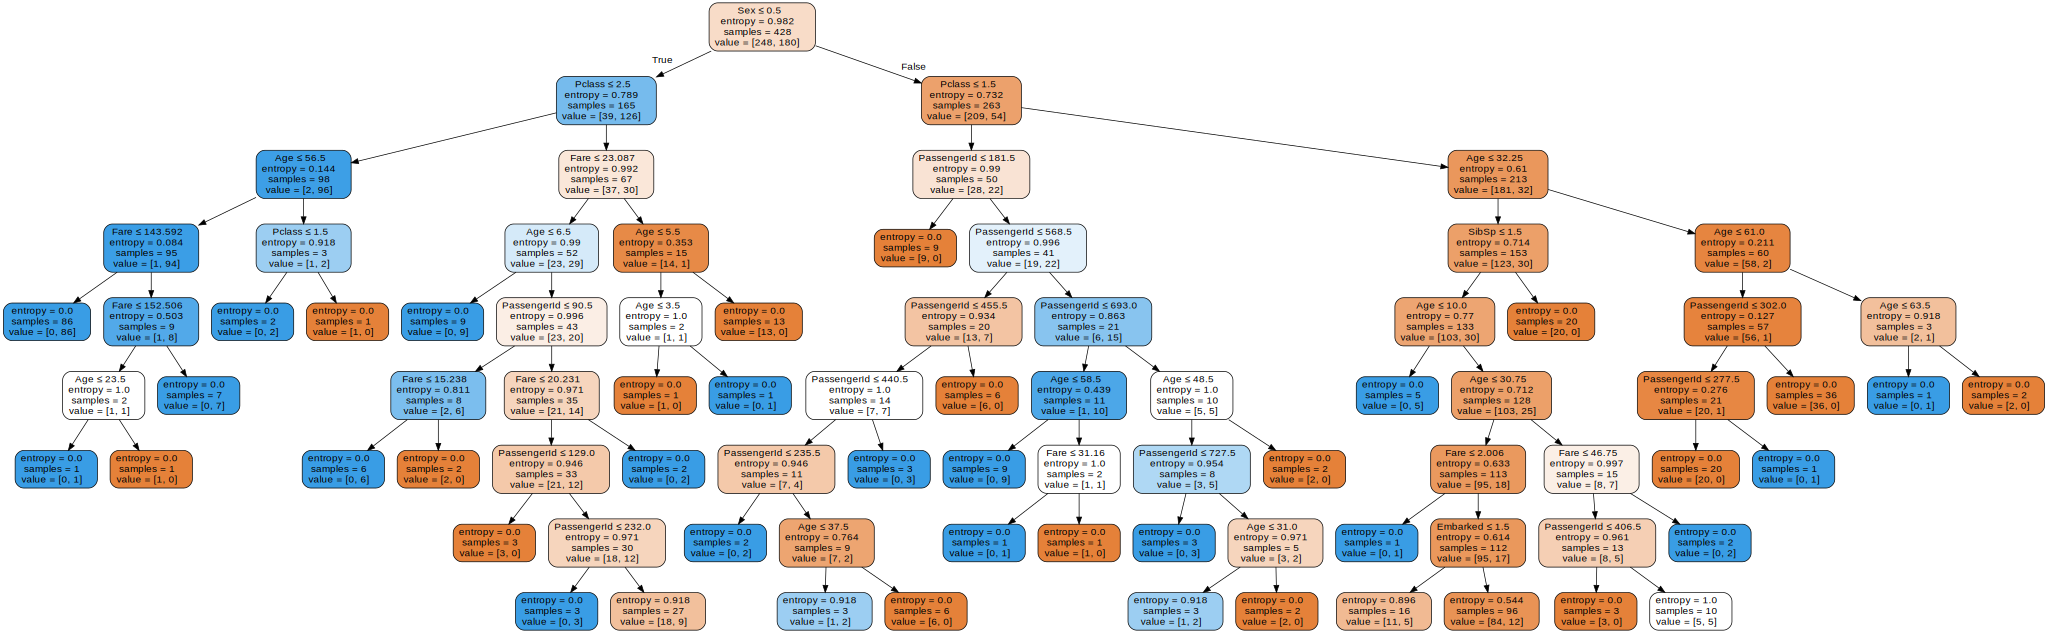

In [73]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph